In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import networkx as nx
import scipy.io as sio
import matplotlib.colors as mcolors
import pandas as pd
import time
from collections import defaultdict

PermissionError: [Errno 1] Operation not permitted

In [26]:
with open(r'graph_centrality_codes/nodes_edges_weighted.pickle', 'rb') as handle:
    B_matrix_weighted, node_coordinates_weighted = pickle.load(handle)
    
with open(r'graph_centrality_codes/distance.pickle', 'rb') as handle:
    distance_array = pickle.load(handle)  
    
#distance_array (1st col - distance (m), 2nd col - time (s), 3rd col - time in traffic (s))

In [27]:
Origin_Destination_Node_Added = pd.read_pickle('Origin_Destination_Node_Added.pkl')

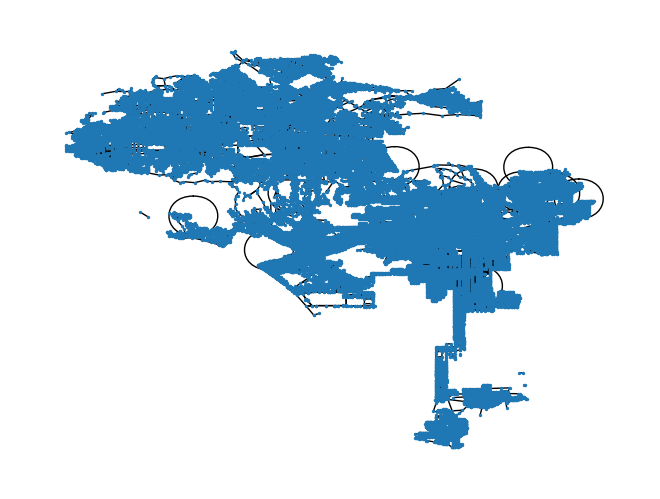

In [28]:
Hillside_edgelist = B_matrix_weighted[:,0:2].astype(int)
NetworkEdgeWt_pre = distance_array[:,2]
# NetworkEdgeWt_pre[NetworkEdgeWt_pre == 0] = 1

temp = np.expand_dims(NetworkEdgeWt_pre, axis = 1)

FinalEdge = np.concatenate((Hillside_edgelist, temp), axis = 1).astype(int)
FinalEdge_df = pd.DataFrame(FinalEdge, columns = ['from', 'to', 'weight'])

G = nx.from_pandas_edgelist(FinalEdge_df, source = 'from', target = 'to', edge_attr = True)

nx.draw(G,pos=node_coordinates_weighted[:,0:2],node_size=2)

In [29]:
# Test to see path output dictionary format

path_dict_test = nx.single_source_dijkstra_path(G, 31165, cutoff=None, weight='weight')

In [30]:
path_dict_test

{31165: [31165],
 41125: [31165, 41125],
 31166: [31165, 31166],
 31164: [31165, 31164],
 31070: [31165, 31164, 31070],
 31075: [31165, 31166, 31075],
 31002: [31165, 31164, 31070, 31002],
 31005: [31165, 31164, 31070, 31002, 31005],
 30963: [31165, 31164, 31070, 31002, 30963],
 30957: [31165, 31164, 31070, 31002, 30963, 30957],
 30737: [31165, 31164, 31070, 31002, 30963, 30737],
 31131: [31165, 31164, 31070, 31002, 31005, 31131],
 30999: [31165, 31164, 31070, 31002, 31005, 30999],
 30735: [31165, 31164, 31070, 31002, 30963, 30957, 30735],
 30611: [31165, 31164, 31070, 31002, 30963, 30737, 30611],
 31163: [31165, 31166, 31163],
 31334: [31165, 31166, 31334],
 30948: [31165, 31166, 31075, 30948],
 30651: [31165, 31164, 31070, 31002, 30963, 30737, 30611, 30651],
 30361: [31165, 31164, 31070, 31002, 30963, 30737, 30611, 30361],
 30606: [31165, 31164, 31070, 31002, 30963, 30737, 30611, 30606],
 30612: [31165, 31164, 31070, 31002, 30963, 30737, 30611, 30612],
 49616: [31165, 31164, 31070, 3

In [31]:
# Make a list of unique nodes identified into blocks

unique_nodes = np.unique(Origin_Destination_Node_Added['w_node_id'])

In [32]:
print('Total Nodes: ' + str(len(Origin_Destination_Node_Added['w_node_id'])))
print('Total Unique Nodes: ' + str(len(unique_nodes)))

Total Nodes: 5373682
Total Unique Nodes: 41789


In [33]:
origin_destination_ids_df = Origin_Destination_Node_Added[['w_node_id', 'h_node_id']]

In [34]:
origin_destination_ids_dict = defaultdict(list)
for origin, destination in zip(origin_destination_ids_df['w_node_id'], origin_destination_ids_df['h_node_id']):
    origin_destination_ids_dict[origin].append(destination)

In [35]:
# Create empty dataframe to store origin ID, destination ID, and path

origin_destination_path_df = pd.DataFrame(columns = ['origin_id', 'destination_id', 'path'])

In [36]:
no_connection_df = pd.DataFrame(columns = ['origin_id', 'destination_id'])

In [37]:
len(unique_nodes)

41789

In [38]:
for node_id in unique_nodes[:1000]:
    try:
        path_dict = nx.single_source_dijkstra_path(G, node_id, cutoff=None, weight='weight')
    except nx.NetworkXNoPath:
        continue

    for destination in origin_destination_ids_dict[node_id]:
        if destination in path_dict:
            origin_destination_path_df.loc[len(origin_destination_path_df.index)] = [node_id, destination, path_dict[destination]]
            # print('Origin ID: ' + str(key) + ' Destination ID: ' + str(destination) + ' Path: ' + str(path_dict[destination]))
        else:
            no_connection_df.loc[len(no_connection_df.index)] = [node_id, destination]
            

KeyboardInterrupt: 

In [ ]:
Origin_Destination_Node_Added[Origin_Destination_Node_Added['w_node_id'] == 31165]

,w_geocode,w_node_id,h_geocode,h_node_id,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate,unique_pair,unique_pair_count,S000_adjusted
1931506,60371011101000,31165,60371011101007,30391,1,0,1,0,0,0,1,0,0,1,20230321,6037101110100060371011101007,4,0.250000
1931506,60371011101000,31165,60371011101007,30589,1,0,1,0,0,0,1,0,0,1,20230321,6037101110100060371011101007,4,0.250000
1931507,60371011101000,31165,60371011222004,31070,1,0,0,1,0,1,0,0,0,1,20230321,6037101110100060371011222004,12,0.083333
1931507,60371011101000,31165,60371011222004,31164,1,0,0,1,0,1,0,0,0,1,20230321,6037101110100060371011222004,12,0.083333
1931507,60371011101000,31165,60371011222004,41110,1,0,0,1,0,1,0,0,0,1,20230321,6037101110100060371011222004,12,0.083333
1931507,60371011101000,31165,60371011222004,41125,1,0,0,1,0,1,0,0,0,1,20230321,6037101110100060371011222004,12,0.083333
1931507,60371011101000,31165,60371011222004,41460,1,0,0,1,0,1,0,0,0,1,20230321,6037101110100060371011222004,12,0.083333
1931507,60371011101000,31165,60371011222004,43506,1,0,0,1,0,1,0,0,0,1,20230321,6037101110100060371011222004,12,0.083333


In [ ]:
origin_destination_path_df

,origin_id,destination_id,path
0,1,173,"[1, 0, 2, 4, 6, 5, 3, 34, 85, 91, 97, 110, 134..."
1,1,195,"[1, 0, 2, 4, 6, 5, 3, 34, 85, 159, 249, 243, 2..."
2,1,223,"[1, 0, 2, 4, 6, 5, 3, 34, 85, 159, 249, 243, 2..."
3,1,3194,"[1, 10, 13, 15, 17, 22, 25, 28, 46, 57, 94, 10..."
4,1,183,"[1, 10, 13, 15, 17, 22, 25, 28, 46, 57, 94, 10..."
...,...,...,...
1894,131,45612,"[131, 230, 255, 256, 281, 350, 417, 410, 409, ..."
1895,131,47218,"[131, 230, 255, 256, 281, 350, 417, 410, 409, ..."
1896,131,47990,"[131, 230, 255, 256, 244, 302, 306, 336, 399, ..."
1897,131,181,"[131, 135, 141, 172, 185, 177, 189, 175, 168, ..."


In [ ]:
no_connection_df

,origin_id,destination_id
0,28,75
1,28,47407
2,28,48458
3,34,75
4,34,47407
...,...,...
89,96,44966
90,96,44967
91,128,43977
92,128,49763
